In [25]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.cluster import KMeans, DBSCAN, OPTICS

In [26]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
labels = np.array(df["quality"])

corrected_data = df.drop(labels=["quality"], axis=1)
for column in corrected_data:
    corrected_data[column] = (corrected_data[column] - corrected_data[column].mean()) / corrected_data[column].std()
corrected_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [29]:
corrected_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,2.132961e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00


In [30]:
def show_embeds(embeds_2d, labels):
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    points_x = []
    points_y = []
    for i, color in enumerate(colors):
        points_x.append(np.transpose(embeds_2d[np.where(labels == unique_labels[i])])[0])
        points_y.append(np.transpose(embeds_2d[np.where(labels == unique_labels[i])])[1])
        plt.scatter(points_x[i], points_y[i], color=color, label=unique_labels[i])
    plt.title('UMAP embeddings')
    plt.legend()
    plt.show()

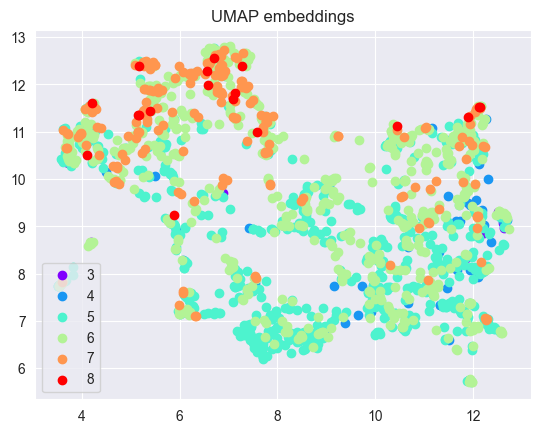

In [31]:
embeds_2d = umap.UMAP(n_neighbors=30, min_dist=0.025).fit_transform(corrected_data)
show_embeds(embeds_2d, labels)

C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


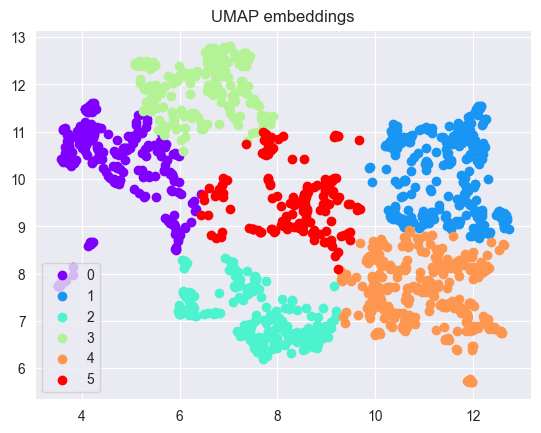

In [32]:
km = KMeans(n_clusters=6)
labels1 = km.fit_predict(embeds_2d)
show_embeds(embeds_2d, labels=labels1)

Clusters count:  5


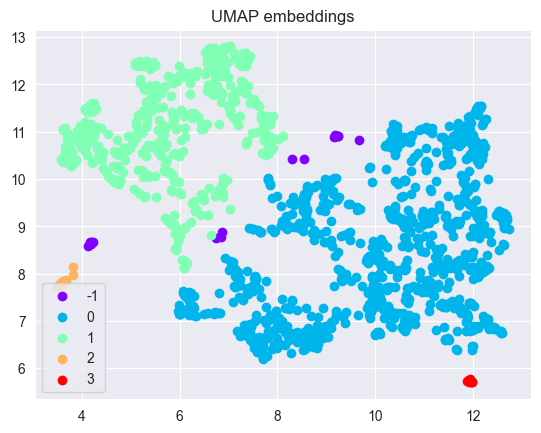

In [33]:
dbs = DBSCAN(eps=0.44, min_samples=9)
labels2 = dbs.fit_predict(embeds_2d)
print('Clusters count: ', len(np.unique(labels2)))
show_embeds(embeds_2d, labels=labels2)

In [43]:
def show_metrics(labels_new):
    print('Inner metric (RAND): ', metrics.rand_score(labels, labels_new))
    print('Outer metric (Davies Bouldin): ', metrics.davies_bouldin_score(embeds_2d, labels_new))

In [44]:
print('Kmeans: ')
show_metrics(labels1)
print('Dbscan: ')
show_metrics(labels2)

Kmeans: 
Inner metric (RAND):  0.617894006031617
Outer metric (Davies Bouldin):  0.7740928576708811
Dbscan: 
Inner metric (RAND):  0.5379003303848384
Outer metric (Davies Bouldin):  1.4082241926679122


In [36]:
def get_metrics(labels_new):
    return metrics.rand_score(labels, labels_new), metrics.davies_bouldin_score(embeds_2d, labels_new)

C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vovak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

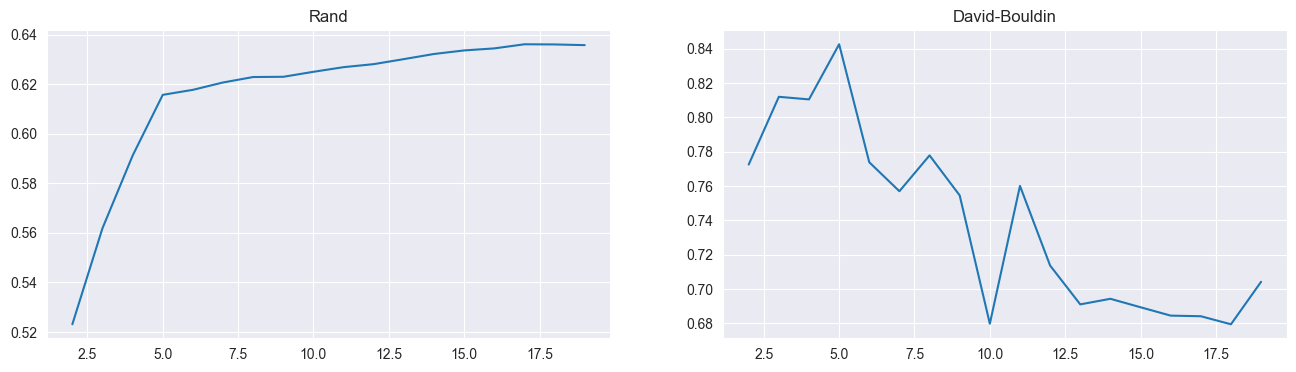

In [37]:
x, y1, y2 = list(range(2, 20)), [], []

for n_clusters in x:
    km = KMeans(n_clusters=n_clusters)
    labels_tmp = km.fit_predict(embeds_2d)
    y1_tmp, y2_tmp = get_metrics(labels_tmp)
    y1.append(y1_tmp)
    y2.append(y2_tmp)

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
axes[0].set_title("Rand")
axes[0].plot(x, y1)
axes[1].set_title("David-Bouldin")
axes[1].plot(x, y2)

In [38]:
def set_plot_vals(ax, xs, ys):
    ys_norm = list(map(list, zip(*ys)))
    for i, x in enumerate(xs):
        ax.annotate(
            "({:.2f}, {})".format(ys_norm[1][i], ys_norm[2][i]),
            (x, ys_norm[0][i]),
            textcoords="offset points",
            xytext=(0, -16),
            ha='center'
        )

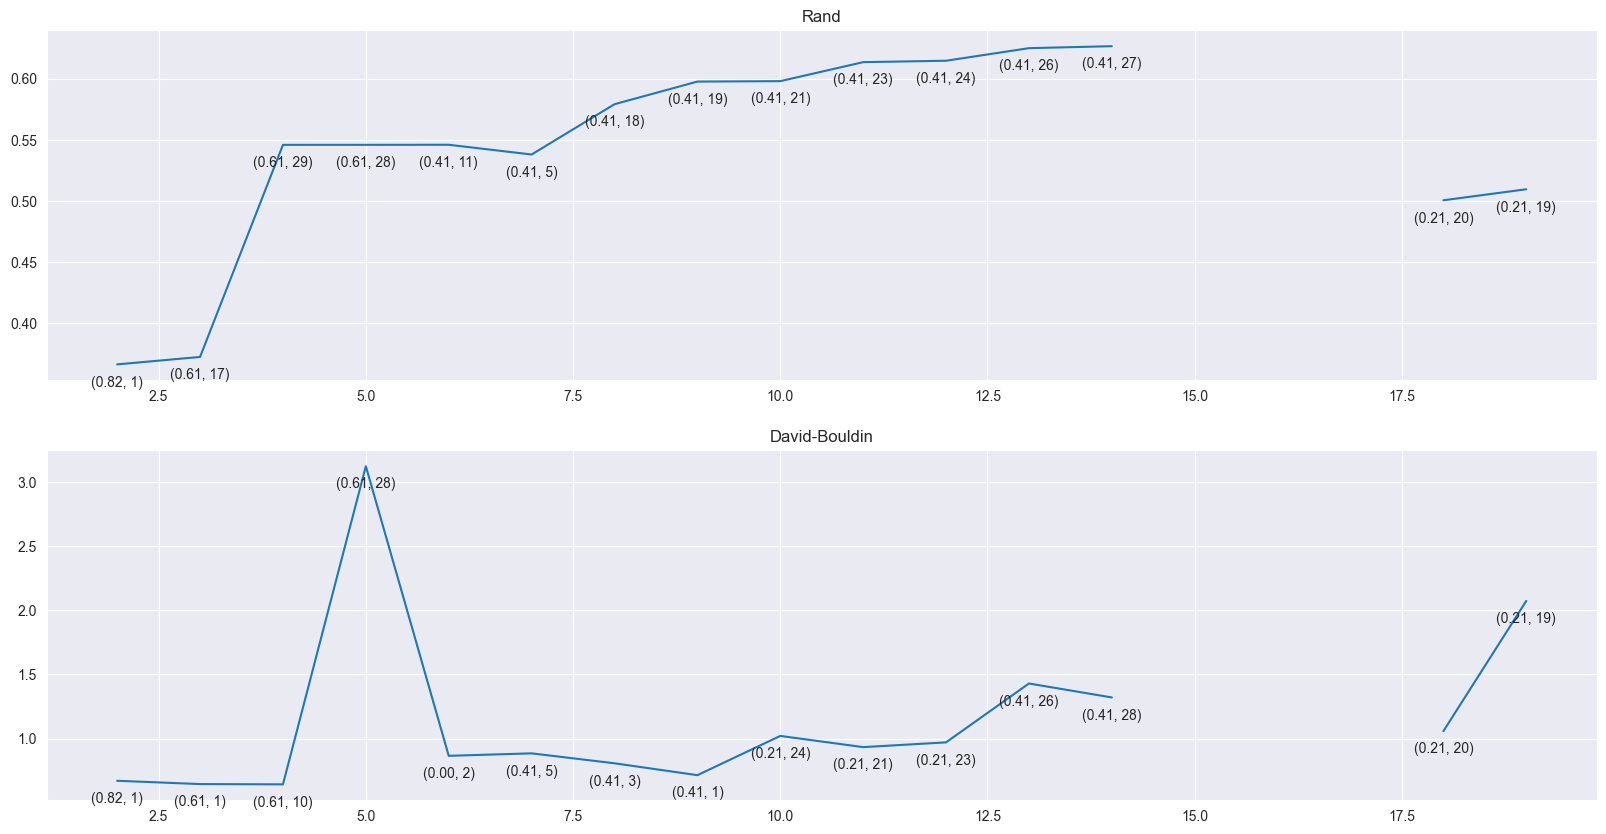

In [39]:
x, y1, y2 = list(range(2, 20)), {}, {}

for eps in np.linspace(1e-3, 10):
    for min_samples in np.arange(1, 30):
        dbs = DBSCAN(eps=eps, min_samples=min_samples)
        labels_tmp = dbs.fit_predict(embeds_2d)
        labels_count = len(np.unique(labels_tmp))
        if labels_count != 1 and labels_count != embeds_2d.shape[0]:
            y1_tmp, y2_tmp = get_metrics(labels_tmp)
            if y1.get(labels_count, (-1e9, _, _))[0] < y1_tmp:
                y1[labels_count] = (y1_tmp, eps, min_samples)
            if y2.get(labels_count, (1e9, _, _))[0] > y2_tmp:
                y2[labels_count] = (y2_tmp, eps, min_samples)

_, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
axes[0].set_title("Rand")
axes[0].plot(x, [y1.get(i, (np.Inf, _, _))[0] for i in x])
axes[1].set_title("David-Bouldin")
axes[1].plot(x, [y2.get(i, (np.Inf, _, _))[0] for i in x])
set_plot_vals(axes[0], x, [y1.get(i, (np.Inf, -1, -1)) for i in x])
set_plot_vals(axes[1], x, [y2.get(i, (np.Inf, -1, -1)) for i in x])

Clusters count:  6


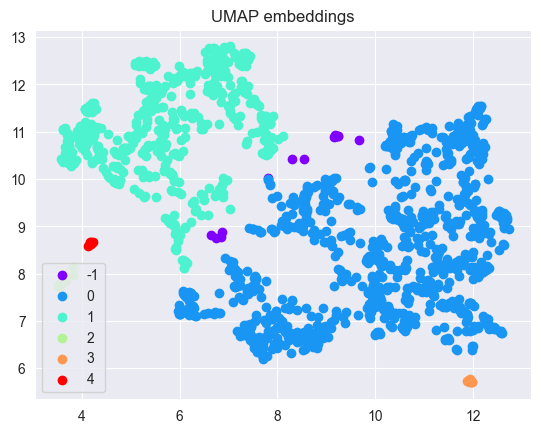

In [40]:
dbs = DBSCAN(eps=0.41, min_samples=8)
labels3 = dbs.fit_predict(embeds_2d)
print('Clusters count: ', len(np.unique(labels3)))
show_embeds(embeds_2d, labels=labels3)